In [2]:
from fastai.vision.all import *
import torch
torch.cuda.empty_cache()

In [3]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1660 Ti with Max-Q Design'

In [4]:
path = Path("equlized/")
fnames = get_image_files(path)
print(f"Total Images: {len(fnames)}")
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, num_workers=0, bs=16)

Total Images: 1324


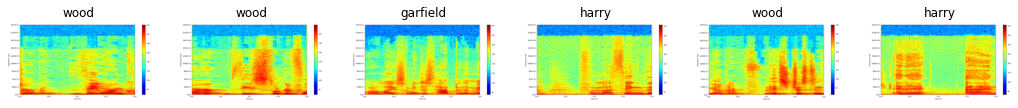

In [7]:
dls.valid.show_batch(max_n=6, nrows=1)
learn = cnn_learner(dls, resnet18, metrics= error_rate)
learn.model = learn.model.cuda()

Minimum/10: 3.98e-03, steepest point: 1.58e-06


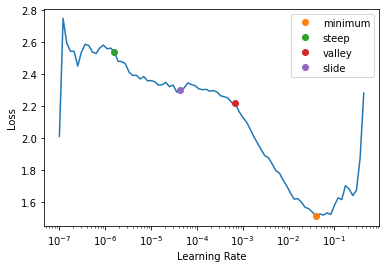

In [8]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print(f"Minimum/10: {lrs.minimum:.2e}, steepest point: {lrs.steep:.2e}")

In [10]:
learn.fine_tune(5, base_lr=1.0e-01)

epoch,train_loss,valid_loss,error_rate,time
0,1.068702,43.755901,0.545455,00:18


epoch,train_loss,valid_loss,error_rate,time
0,2.272724,67.248169,0.492424,00:22
1,1.826299,102.836090,0.674242,00:22
2,1.271663,0.873640,0.053030,00:22
3,0.682617,0.084494,0.007576,00:22
4,0.584150,0.017865,0.007576,00:23


Path('equlized/models/my_model.pth')

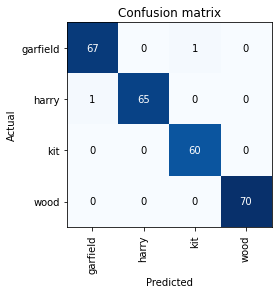

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()
learn.export()
learn.save("my_model")

In [14]:
liste2 = []
for i in range(0,300):
    liste2.append(learn.predict("ortak/ortakim{}.png".format(i))[0])
textfile = open("liste2.txt", "w")
for element in liste2:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
# learn = load_learner("export.pkl", cpu=False)